In [268]:
import IPython.display as ipd
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import glob

In [11]:
ipd.Audio('D:/Manisha/Research_project/Mapeli/Final_data/splitted/part1-5_splitted/A001013001_Edited_000.wav')

In [12]:
data, sampling_rate = librosa.load('D:/Manisha/Research_project/Mapeli/Final_data/splitted/part1-5_splitted/A001013001_Edited_000.wav')

In [13]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


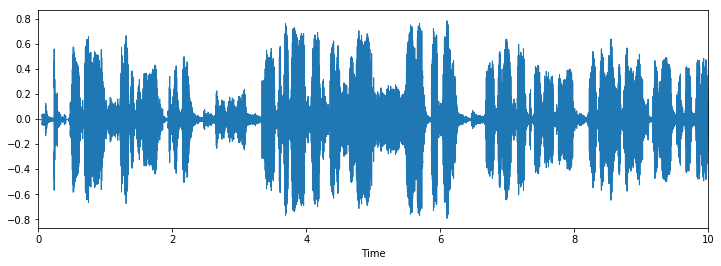

In [14]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

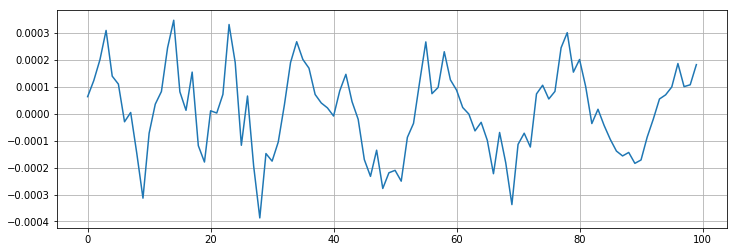

In [15]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(12, 4))
plt.plot(data[n0:n1])
plt.grid()

In [16]:
zero_crossings = librosa.zero_crossings(data[n0:n1], pad=False)
print(sum(zero_crossings))

20


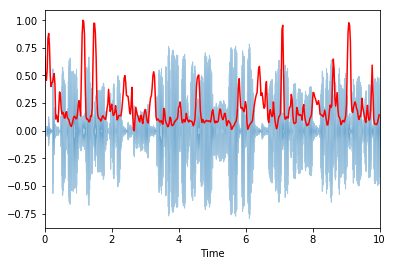

In [17]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(data, sr=sampling_rate)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(data, axis=0):
    return sklearn.preprocessing.minmax_scale(data, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

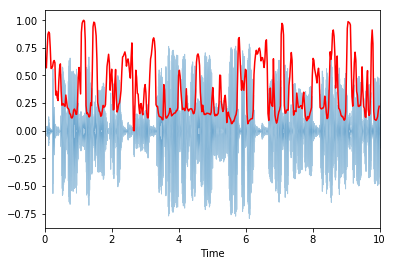

In [18]:
spectral_rolloff = librosa.feature.spectral_rolloff(data, sr=sampling_rate)[0]
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

(20, 431)


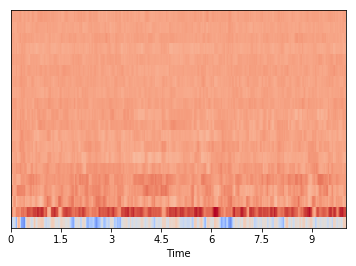

In [19]:
mfccs = librosa.feature.mfcc(data, sr=sampling_rate)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

In [20]:
np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40).T,axis=0)

array([-1.83426950e+02,  1.09351857e+02,  9.66859141e+00,  1.61891226e+01,
        2.67887519e+01,  9.33547158e+00, -8.82929878e+00, -1.83479602e-01,
       -6.95505270e+00,  2.08066876e+00, -2.53673903e+00,  3.07398504e+00,
       -4.61318698e+00, -2.65254949e+00, -3.06343557e-01, -2.52451932e+00,
       -1.14128845e+01, -4.41915798e-02, -5.67335244e+00, -1.12164465e+00,
       -4.01281126e+00,  1.56989691e+00, -7.29938144e+00,  6.11144811e-01,
       -5.98935816e+00, -8.44510265e-01, -5.77100380e+00, -1.18599221e+00,
       -5.70630655e+00, -6.71791690e-01, -5.01539529e+00, -2.77017385e+00,
       -4.66204321e+00, -6.07023951e-01, -3.68255281e+00,  7.72210733e-01,
       -3.76318024e+00,  2.48751509e+00, -2.33718443e+00, -1.09574608e-01])

MFCC:
The first step in any automatic speech recognition system is to extract features i.e. identify the components of the audio signal that are good for identifying the linguistic content and discarding all the other stuff which carries information like background noise, emotion etc.

The main point to understand about speech is that the sounds generated by a human are filtered by the shape of the vocal tract including tongue, teeth etc. This shape determines what sound comes out. If we can determine the shape accurately, this should give us an accurate representation of the phoneme being produced. The shape of the vocal tract manifests itself in the envelope of the short time power spectrum, and the job of MFCCs is to accurately represent this envelope.

Mel Frequency Cepstral Coefficents (MFCCs) are a feature widely used in automatic speech and speaker recognition.

# Loading Files and Extracting the Features

In [21]:
#Loading all Nepali files and extracting the features
path = 'D:/Manisha/Research_project/Data/sample/Train/Nepali' 
files = os.listdir(path)
X_nepali_train_list=[]
y_nepali_train_list=[]


for name in files:
    file_name=os.path.join(os.path.abspath(path), name)
   
   # handle exception to check if there isn't a file which is corrupted
    try:
      # here kaiser_fast is a technique used for faster extraction
      X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
      # we extract mfcc feature from data
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
    except Exception as e:
      print("Error encountered while parsing file: ", file)
        
    feature=mfccs
    label=1
    
    X_nepali_train_list.append(feature)
    y_nepali_train_list.append(label)

In [22]:
X_nepali_train_list

[array([-189.32861325,  117.65941405,    1.49151536,   24.15174933,
          19.12088176,   16.63967789,  -15.70093523,    6.20517926,
         -12.81592852,    7.37881561,   -7.250462  ,    7.19357516,
          -8.13743369,    0.2838959 ,   -2.67239112,   -0.70296337,
         -12.72164886,    0.78743969,   -6.06661238,   -1.12558179,
          -3.65422692,    0.89938829,   -6.35842262,   -0.56114994,
          -4.62213297,   -2.37330061,   -4.11078456,   -2.95051925,
          -3.86146821,   -2.57605477,   -3.06975552,   -4.74202474,
          -2.67670825,   -2.59514512,   -1.70049736,   -1.19639962,
          -1.81418775,    0.56338402,   -0.44236488,   -1.97121924]),
 array([-2.07601758e+02,  1.05442533e+02, -9.18958020e-01,  3.69030881e+01,
         6.85833072e+00,  1.03272936e+01, -1.33292938e+01,  7.96617476e+00,
        -1.16865378e+01,  5.34732241e+00, -1.21730666e+01,  5.64406326e+00,
        -9.01127231e+00,  5.88076791e+00, -5.62377551e+00,  1.59294710e+00,
        -8.333

#Converting MP3 files to WAV files

In [23]:
#Loading all Non Nepali files and extracting the features
path = 'D:/Manisha/Research_project/Data/sample/Train/NonNepali_wav' 
files = os.listdir(path)
X_non_nepali_train_list=[]
y_non_nepali_train_list=[]

for name in files:
    file_name=os.path.join(os.path.abspath(path), name)
   
   # handle exception to check if there isn't a file which is corrupted
    try:
      # here kaiser_fast is a technique used for faster extraction
      X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
      # we extract mfcc feature from data
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
    except Exception as e:
      print("Error encountered while parsing file: ", file_name)
        
    feature=mfccs
    label=0
    
    X_non_nepali_train_list.append(feature)
    y_non_nepali_train_list.append(label)

In [24]:
X_train=X_nepali_train_list + X_non_nepali_train_list

In [25]:
y_train=y_nepali_train_list + y_non_nepali_train_list

In [26]:
len(X_train)

2069

In [27]:
y_train

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [28]:
#Loading all Nepali files and extracting the features
path = 'D:/Manisha/Research_project/Data/sample/Test/Nepali' 
files = os.listdir(path)
X_nepali_test_list=[]
y_nepali_test_list=[]
for name in files:
    file_name=os.path.join(os.path.abspath(path), name)
   
   # handle exception to check if there isn't a file which is corrupted
    try:
      # here kaiser_fast is a technique used for faster extraction
      X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
      # we extract mfcc feature from data
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
    except Exception as e:
      print("Error encountered while parsing file: ", file)
        
    feature=mfccs
    label=1
    
    X_nepali_test_list.append(feature)
    y_nepali_test_list.append(label)

In [29]:
#Loading all Non Nepali files and extracting the features
path = 'D:/Manisha/Research_project/Data/sample/Test/NonNepali_wav' 
files = os.listdir(path)
X_non_nepali_test_list=[]
y_non_nepali_test_list=[]

for name in files:
    file_name=os.path.join(os.path.abspath(path), name)
   
   # handle exception to check if there isn't a file which is corrupted
    try:
      # here kaiser_fast is a technique used for faster extraction
      X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
      # we extract mfcc feature from data
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
    except Exception as e:
      print("Error encountered while parsing file: ", file_name)
        
    feature=mfccs
    label=0
    
    X_non_nepali_test_list.append(feature)
    y_non_nepali_test_list.append(label)

In [30]:
X_test = X_nepali_test_list + X_non_nepali_test_list

In [31]:
y_test = y_nepali_test_list + y_non_nepali_test_list

In [32]:
len(X_test)

398

In [33]:
len(y_test)

398

In [86]:
pd.DataFrame(X_train).to_csv('D:/Manisha/Research_project/Mapeli/Final_data/X_train.csv', index=False)

In [87]:
pd.DataFrame(X_test).to_csv('D:/Manisha/Research_project/Mapeli/Final_data/X_test.csv', index=False)

In [88]:
pd.DataFrame(y_train).to_csv('D:/Manisha/Research_project/Mapeli/Final_data/y_train.csv',index=False)

In [89]:
pd.DataFrame(y_test).to_csv('D:/Manisha/Research_project/Mapeli/Final_data/y_test.csv', index=False)

In [90]:
X_train = pd.read_csv("D:/Manisha/Research_project/Mapeli/Final_data/X_train.csv") 

In [91]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-189.328613,117.659414,1.491515,24.151749,19.120882,16.639678,-15.700935,6.205179,-12.815929,7.378816,...,-3.069756,-4.742025,-2.676708,-2.595145,-1.700497,-1.196400,-1.814188,0.563384,-0.442365,-1.971219
1,-207.601758,105.442533,-0.918958,36.903088,6.858331,10.327294,-13.329294,7.966175,-11.686538,5.347322,...,0.976734,0.063021,-0.287557,-1.054214,-0.677964,-1.563288,-4.310939,-1.758439,0.379995,-1.390890
2,-204.612971,102.677341,-5.423023,31.103619,0.746116,8.005764,-7.790323,7.686906,-14.658664,4.837651,...,1.800027,1.608089,1.507645,-0.328256,0.402898,-1.005020,-3.096341,-0.725090,0.388818,-1.041726
3,-222.838416,109.324456,17.436341,40.953967,13.607811,29.030590,-11.284326,2.450296,-17.903954,3.367757,...,-0.204638,-3.934294,-1.728715,-2.357171,-0.208773,-1.719596,-3.695296,0.279644,0.240339,-2.118414
4,-245.500543,111.793611,20.483942,31.590126,7.160237,28.150005,-4.662595,9.713407,-16.737442,6.062475,...,-0.704997,-0.905956,-1.583751,-3.015934,0.749232,-0.912026,-3.024046,0.735373,0.863629,-1.363364


In [92]:
X_train = X_train.values

In [93]:
X_train

array([[-1.89328613e+02,  1.17659414e+02,  1.49151536e+00, ...,
         5.63384025e-01, -4.42364884e-01, -1.97121924e+00],
       [-2.07601758e+02,  1.05442533e+02, -9.18958020e-01, ...,
        -1.75843919e+00,  3.79994872e-01, -1.39089044e+00],
       [-2.04612971e+02,  1.02677341e+02, -5.42302333e+00, ...,
        -7.25089830e-01,  3.88818148e-01, -1.04172603e+00],
       ...,
       [-2.96274905e+02,  1.13802151e+02,  4.78691476e+00, ...,
        -2.37543090e+00, -5.88186532e-01, -2.81378253e+00],
       [-2.64031075e+02,  1.13748149e+02,  5.01328918e+00, ...,
        -1.85510958e+00, -9.08485515e-01, -3.76533819e-01],
       [-2.99021543e+02,  1.15731555e+02, -1.41670856e-01, ...,
        -2.27282694e+00, -1.22022195e+00, -6.79203930e-01]])

In [94]:
X_test = pd.read_csv("D:/Manisha/Research_project/Mapeli/Final_data/X_test.csv")

In [95]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-90.962511,120.749511,-12.826492,39.329445,-2.147807,13.798149,-12.477163,4.455029,-9.904941,7.103692,...,-4.003503,-1.650985,-1.871642,-3.640150,-2.481027,-3.014283,-1.224120,-2.532014,-2.403167,-2.101631
1,-72.267172,102.230468,-13.439120,30.175294,-12.144765,12.435991,-12.835633,5.971533,-16.391536,6.061177,...,-1.952360,-1.752537,-1.268691,-0.386239,-1.150160,-1.170330,0.502992,-0.611007,-0.761657,0.299979
2,-105.660069,98.686361,-13.315759,35.220642,-7.145883,10.772040,-13.461549,2.923796,-12.772798,5.780166,...,-3.191785,-4.406435,-3.013123,-3.544520,-3.265410,-1.815372,-0.234054,-1.196061,-0.456483,-1.562110
3,-87.740366,112.268391,-16.457901,40.486360,-5.286902,9.872345,-17.765643,-2.386981,-18.985588,4.930487,...,-3.271420,-2.376911,-2.284309,-3.151394,-2.063127,-2.848515,-2.094622,-2.219627,-0.663922,-1.206114
4,-110.604924,119.460333,-4.425567,41.255507,-2.430610,9.509187,-14.655403,-1.604588,-17.298994,7.350737,...,-2.859888,-4.653794,-2.356362,-2.469194,-2.157263,-2.685104,-1.154958,-2.307608,-0.332935,-0.134304


In [96]:
X_test = X_test.values

In [97]:
X_test

array([[-9.09625112e+01,  1.20749511e+02, -1.28264921e+01, ...,
        -2.53201420e+00, -2.40316689e+00, -2.10163119e+00],
       [-7.22671723e+01,  1.02230468e+02, -1.34391198e+01, ...,
        -6.11006961e-01, -7.61656565e-01,  2.99978531e-01],
       [-1.05660069e+02,  9.86863607e+01, -1.33157590e+01, ...,
        -1.19606089e+00, -4.56482651e-01, -1.56211032e+00],
       ...,
       [-3.16370482e+02,  1.21092927e+02,  1.19522575e+01, ...,
        -2.02820401e+00, -2.90389393e-01, -6.92773734e-01],
       [-2.69164658e+02,  1.14816335e+02, -2.16460253e+00, ...,
        -9.02199180e-01, -3.38147688e-01,  2.26889745e-01],
       [-2.79802758e+02,  8.53046236e+01, -1.60033472e+01, ...,
        -7.03896534e-01, -2.32444101e+00, -2.00977512e+00]])

In [98]:
y_train = pd.read_csv("D:/Manisha/Research_project/Mapeli/Final_data/y_train.csv")

In [99]:
y_train['0'].value_counts()

0    1069
1    1000
Name: 0, dtype: int64

In [100]:
y_train = y_train.values

In [101]:
y_train

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [188]:
y_test = pd.read_csv("D:/Manisha/Research_project/Mapeli/Final_data/y_test.csv")

In [189]:
y_test.head()

,1
0,1
1,1
2,1
3,1
4,1


In [190]:
y_test = y_test.values

In [191]:
X_train.shape[1]

40

# ANN

In [244]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [245]:
model = models.Sequential()

In [252]:
model.add(layers.Dense(256, activation='relu', kernel_initializer = 'uniform', input_shape=(X_train.shape[1],)))

In [254]:
model.add(Dropout(0.2))

In [255]:
X_train.shape

(2069, 40)

In [256]:
model.add(layers.Dense(128, kernel_initializer = 'uniform', activation='relu'))

In [257]:
model.add(Dropout(0.2))

In [258]:
model.add(layers.Dense(64,kernel_initializer = 'uniform', activation='relu'))

In [259]:
model.add(Dropout(0.2))

In [260]:
model.add(layers.Dense(10, activation='softmax'))

In [261]:
model.add(Dropout(0.2))

In [262]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [263]:
history = model.fit(X_train,
                    y_train,
                    epochs=1000,
                    batch_size=128)

Epoch 1/1000
2069/2069 [==============================] - 1s 388us/step - loss: 3.6889 - acc: 0.4645
Epoch 2/1000
2069/2069 [==============================] - 0s 45us/step - loss: 2.9385 - acc: 0.5863
Epoch 3/1000
2069/2069 [==============================] - 0s 46us/step - loss: 1.8390 - acc: 0.6945
Epoch 4/1000
2069/2069 [==============================] - 0s 48us/step - loss: 1.0708 - acc: 0.7540
Epoch 5/1000
2069/2069 [==============================] - 0s 45us/step - loss: 0.8776 - acc: 0.7704
Epoch 6/1000
2069/2069 [==============================] - 0s 48us/step - loss: 0.8820 - acc: 0.7670
Epoch 7/1000
2069/2069 [==============================] - 0s 45us/step - loss: 0.8176 - acc: 0.7878
Epoch 8/1000
2069/2069 [==============================] - 0s 45us/step - loss: 0.7223 - acc: 0.7791
Epoch 9/1000
2069/2069 [==============================] - 0s 47us/step - loss: 0.7156 - acc: 0.7801
Epoch 10/1000
2069/2069 [==============================] - 0s 46us/step - loss: 0.5993 - acc: 0.799

# Decision tree

In [269]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [270]:
y_test.shape

(398, 1)

In [271]:
print(type(y_test))

<class 'numpy.ndarray'>


In [272]:
y_pred=classifier.predict(X_test)

In [273]:
y_pred.shape

(398,)

In [276]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.9024494949494949

In [277]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[196,   2],
       [ 37, 163]], dtype=int64)

# Random Forest

In [278]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

C:\Users\gautam\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [279]:
y_pred=classifier.predict(X_test)

In [280]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[198   0]
 [ 55 145]]


In [281]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.8625

# SVM

In [282]:
from sklearn.svm import SVC
classifier=SVC(kernel='poly', random_state=0)
classifier.fit(X_train, y_train)

C:\Users\gautam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gautam\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [283]:
y_pred=classifier.predict(X_test)

In [284]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[198,   0],
       [  0, 200]], dtype=int64)

In [285]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

1.0